<a href="https://colab.research.google.com/github/xoberoncs/projects/blob/main/Who's%20that%20Pok%C3%A9mon%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt                                                  # Importing needed libraries
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from PIL import Image

In [2]:
data_dir = '/content/drive/MyDrive/Who is that Pokémon/PokemonData'              # Importing image dataset that was uploaded on my Google Drive

In [3]:
batch_size = 32                                                                  # Fixing image scales
img_height = 180
img_width = 180

In [24]:
train_ds = tf.keras.utils.image_dataset_from_directory(                          # Getting all images from the 5 folders (classes) and splitting them into two
  data_dir,                                                                      # new datasets, one for training..
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 754 files belonging to 5 classes.
Using 604 files for training.


In [25]:
val_ds = tf.keras.utils.image_dataset_from_directory(                            # ..and the other to validation
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 754 files belonging to 5 classes.
Using 150 files for validation.


In [26]:
class_names = train_ds.class_names                                               # Checking if the classes were taken correctly and presenting the 5 Pokémon
print(class_names)                                                               # that our Pokédex will recognize

['Bulbasaur', 'Charmander', 'Mew', 'Pikachu', 'Squirtle']


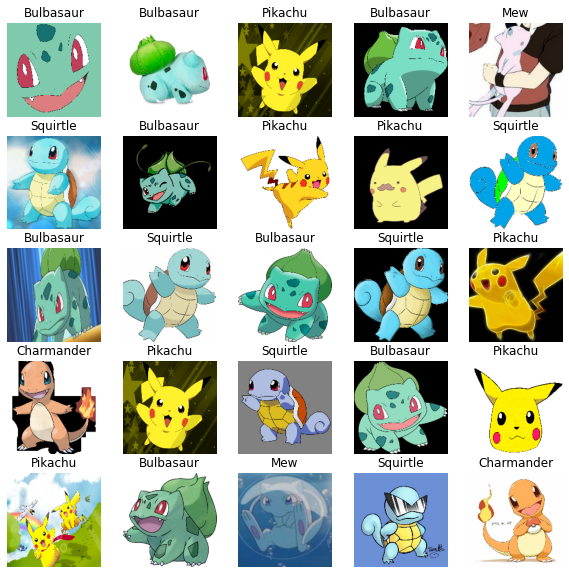

In [27]:
import matplotlib.pyplot as plt                                                  # Here we iterated through the first 25 images from our training dataset to show
                                                                                 # a short summary of the different kinds of images and Pokémons we have
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [28]:
for image_batch, labels_batch in train_ds:                                       # Showing the shape of our images (size of the batch taken = 32,
  print(image_batch.shape)                                                       #                                  heigth = 180,                                   
  print(labels_batch.shape)                                                      #                                  width = 180,
  break                                                                          #                                  colors = 3 (rgb)
                                                                                 #                                  )

(32, 180, 180, 3)
(32,)


In [29]:
AUTOTUNE = tf.data.AUTOTUNE                                                      # A small performance configuration, it boosts our speed while loading 
                                                                                 # images
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [30]:
normalization_layer = layers.Rescaling(1./255)                                   # Standarlizing the RGB channel values to [0, 1]
                                                                                 # It makes the work easier to our Neural Network
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))                                  # Checking channel values to [0, 1]

0.0 1.0


In [32]:
num_classes = len(class_names)                                                   # To create this algorithm, we will use the Sequential model,
                                                                                 # it allows us to build it layer by layer. 
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),                                                               # The approach we are using is a standart one for low number of
  layers.Conv2D(16, 3, padding='same', activation='relu'),                       # layers and input and output tensors.
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [33]:
model.compile(optimizer='adam',                                                        # Compiling the model using a standart optimizer, "Adam"
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),    
              metrics=['accuracy'])                                                    

In [34]:
model.summary()                                                                  # A summary of the layers of our CNN

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 45, 45, 64)       

In [35]:
epochs=10                                                                        # 10 epochs chosen for the training
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
19/19 [==============================] - 21s 1s/step - loss: 1.1775 - accuracy: 0.5132 - val_loss: 0.7297 - val_accuracy: 0.7533
Epoch 2/10
19/19 [==============================] - 18s 972ms/step - loss: 0.5229 - accuracy: 0.8129 - val_loss: 0.6088 - val_accuracy: 0.8133
Epoch 3/10
19/19 [==============================] - 18s 976ms/step - loss: 0.3055 - accuracy: 0.9189 - val_loss: 0.3650 - val_accuracy: 0.8533
Epoch 4/10
19/19 [==============================] - 18s 972ms/step - loss: 0.1213 - accuracy: 0.9652 - val_loss: 0.2927 - val_accuracy: 0.9133
Epoch 5/10
19/19 [==============================] - 20s 1s/step - loss: 0.0912 - accuracy: 0.9685 - val_loss: 0.2443 - val_accuracy: 0.9067
Epoch 6/10
19/19 [==============================] - 18s 974ms/step - loss: 0.0288 - accuracy: 0.9950 - val_loss: 0.2045 - val_accuracy: 0.9267
Epoch 7/10
19/19 [==============================] - 18s 972ms/step - loss: 0.0140 - accuracy: 0.9983 - val_loss: 0.2724 - val_accuracy: 0.9200
Epoch

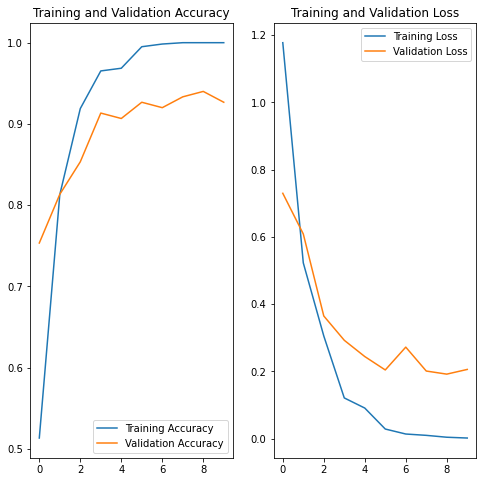

In [36]:
acc = history.history['accuracy']                                                # Plotting a graph that shows accuracy and loss
val_acc = history.history['val_accuracy']                                        # per epochs of training and validation datasets

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')                                                    # As we can see, the model performed already very well 
plt.title('Training and Validation Loss')                                        # in it's duty, so we won't apply any actions to battle
plt.show()                                                                       # a possible overfitting case
                                                                                 # More epochs won't be needed as well, we can see it's
                                                                                 # accuracy stabilized after the 5th

In [37]:
image_paths = ['/content/drive/MyDrive/Who is that Pokémon/Testing/Bulbasaur/00000035.jpg',                                         # Selected 5 images that WERE NOT present in training and validation
               '/content/drive/MyDrive/Who is that Pokémon/Testing/Bulbasaur/00000099.jpg',                                         # datasets and created a list with their paths to be iterared later
               '/content/drive/MyDrive/Who is that Pokémon/Testing/Bulbasaur/00000177.jpg',                                         # Actually I chose by finger those images trying to get pieces that
               '/content/drive/MyDrive/Who is that Pokémon/Testing/Bulbasaur/2df3079c9c22467d97b1932e930709ab.jpg',                 # were the most different possible of the training and validation 
               '/content/drive/MyDrive/Who is that Pokémon/Testing/Bulbasaur/00000237.jpg',                                         # images.

               '/content/drive/MyDrive/Who is that Pokémon/Testing/Charmander/00000184.jpg',
               '/content/drive/MyDrive/Who is that Pokémon/Testing/Charmander/0aaf393c1c214369a0f5a8984b34afdb.jpg',
               '/content/drive/MyDrive/Who is that Pokémon/Testing/Charmander/38.png',
               '/content/drive/MyDrive/Who is that Pokémon/Testing/Charmander/39.jpg',
               '/content/drive/MyDrive/Who is that Pokémon/Testing/Charmander/Charmander05.jpg',

                
               '/content/drive/MyDrive/Who is that Pokémon/Testing/Mew/00000042.png',
               '/content/drive/MyDrive/Who is that Pokémon/Testing/Mew/00000087.png',
               '/content/drive/MyDrive/Who is that Pokémon/Testing/Mew/Mew03.jpg',
               '/content/drive/MyDrive/Who is that Pokémon/Testing/Mew/Mew04.jpg',
               '/content/drive/MyDrive/Who is that Pokémon/Testing/Mew/Mew05.jpg',

               '/content/drive/MyDrive/Who is that Pokémon/Testing/Pikachu/00000214.jpg',
               '/content/drive/MyDrive/Who is that Pokémon/Testing/Pikachu/00000245.png',
               '/content/drive/MyDrive/Who is that Pokémon/Testing/Pikachu/05da808f2caa4bf0a38449d4b172967a.jpg',
               '/content/drive/MyDrive/Who is that Pokémon/Testing/Pikachu/00000028.png',
               '/content/drive/MyDrive/Who is that Pokémon/Testing/Pikachu/41.jpg',

               '/content/drive/MyDrive/Who is that Pokémon/Testing/Squirtle/00000037.jpg',
               '/content/drive/MyDrive/Who is that Pokémon/Testing/Squirtle/00000193.png',
               '/content/drive/MyDrive/Who is that Pokémon/Testing/Squirtle/00000002.jpg',
               '/content/drive/MyDrive/Who is that Pokémon/Testing/Squirtle/00000122.png',
               '/content/drive/MyDrive/Who is that Pokémon/Testing/Squirtle/00000144.png'
               ]


Who's that Pokémon?


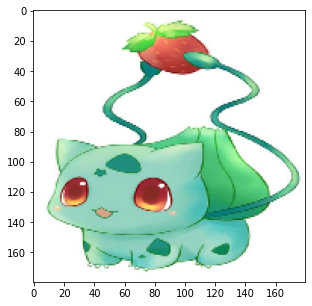

It's a Bulbasaur!
with 99.923% certainty. 


Who's that Pokémon?


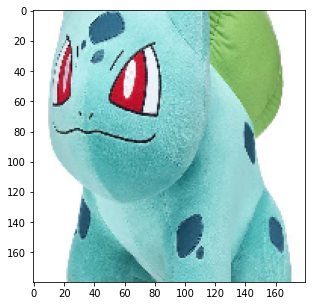

It's a Bulbasaur!
with 99.894% certainty. 


Who's that Pokémon?


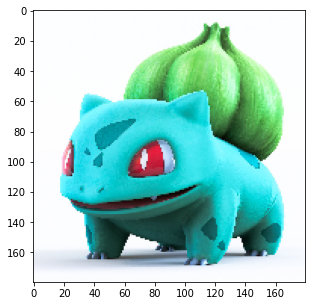

It's a Bulbasaur!
with 100.000% certainty. 


Who's that Pokémon?


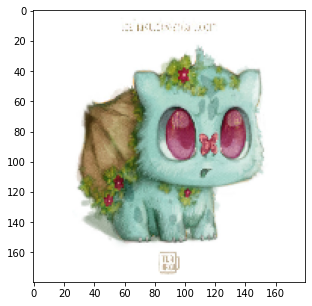

It's a Bulbasaur!
with 80.138% certainty. 


Who's that Pokémon?


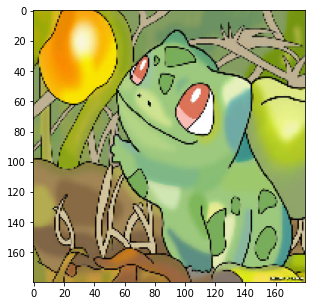

It's a Bulbasaur!
with 99.460% certainty. 


Who's that Pokémon?


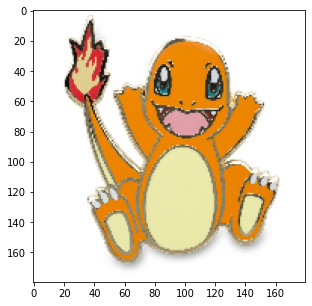

It's a Charmander!
with 94.331% certainty. 


Who's that Pokémon?


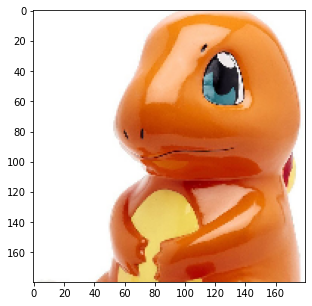

It's a Charmander!
with 99.993% certainty. 


Who's that Pokémon?


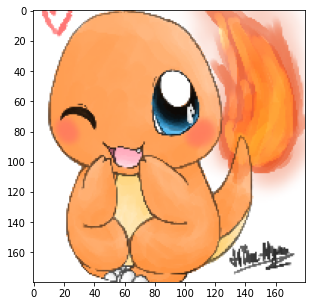

It's a Charmander!
with 99.974% certainty. 


Who's that Pokémon?


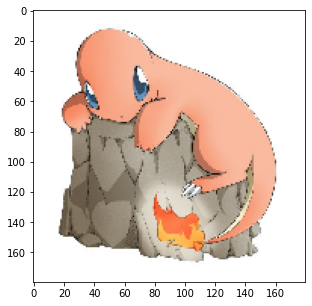

It's a Charmander!
with 99.946% certainty. 


Who's that Pokémon?


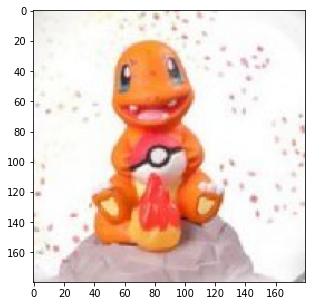

It's a Charmander!
with 99.989% certainty. 


Who's that Pokémon?


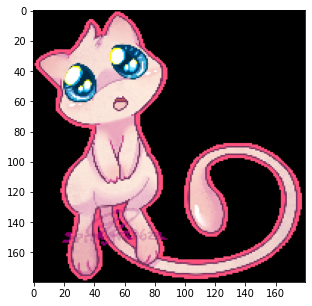

It's a Mew!
with 95.935% certainty. 


Who's that Pokémon?


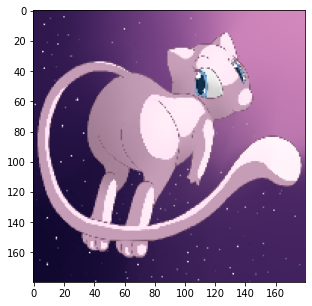

It's a Mew!
with 99.999% certainty. 


Who's that Pokémon?


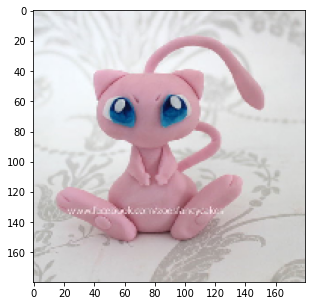

It's a Mew!
with 99.095% certainty. 


Who's that Pokémon?


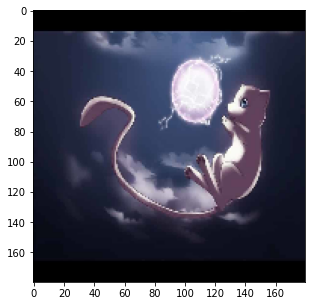

It's a Mew!
with 99.311% certainty. 


Who's that Pokémon?


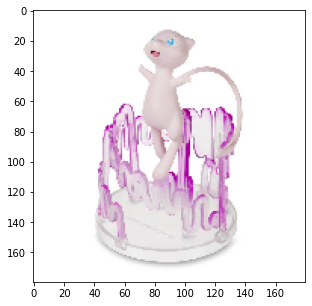

It's a Mew!
with 99.880% certainty. 


Who's that Pokémon?


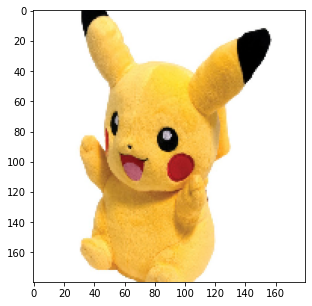

It's a Pikachu!
with 99.999% certainty. 


Who's that Pokémon?


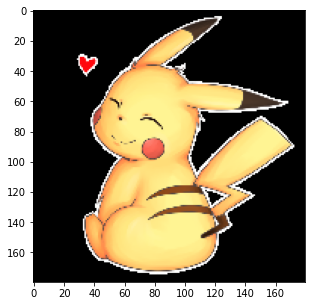

It's a Pikachu!
with 99.791% certainty. 


Who's that Pokémon?


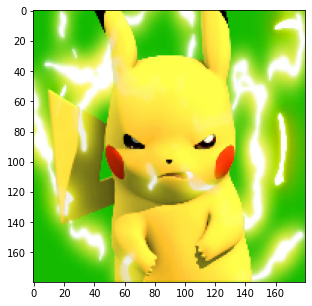

It's a Pikachu!
with 99.925% certainty. 


Who's that Pokémon?


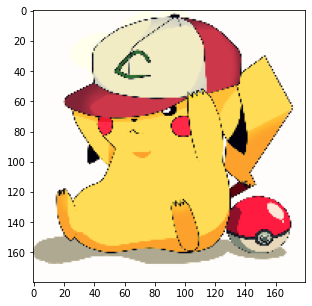

It's a Pikachu!
with 99.852% certainty. 


Who's that Pokémon?


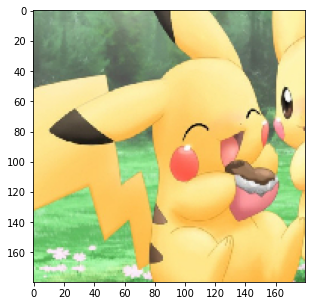

It's a Pikachu!
with 97.083% certainty. 


Who's that Pokémon?


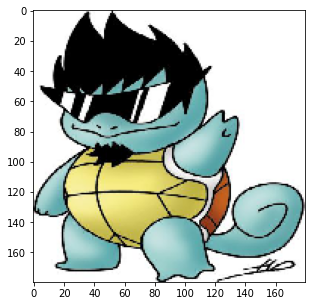

It's a Squirtle!
with 100.000% certainty. 


Who's that Pokémon?


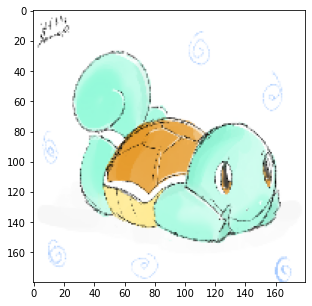

It's a Squirtle!
with 99.754% certainty. 


Who's that Pokémon?


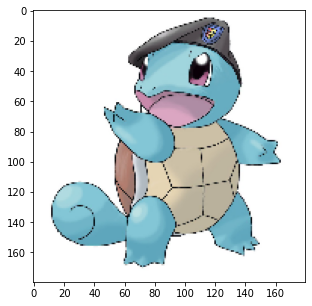

It's a Squirtle!
with 99.982% certainty. 


Who's that Pokémon?


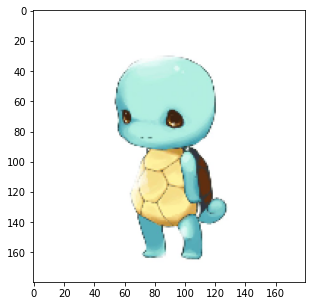

It's a Squirtle!
with 99.732% certainty. 


Who's that Pokémon?


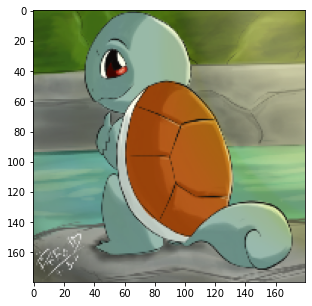

It's a Charmander!
with 83.113% certainty. 




In [43]:
import matplotlib.pyplot as plt                                                    # Loop iterating through that list of image paths                                                
import matplotlib.image as mpimg                                                   # and aplying our model's prediction


for img_path in image_paths:
    print("Who's that Pokémon?")
    img = tf.keras.utils.load_img(path= img_path,
                                  grayscale=False,
                                  color_mode='rgb',
                                  target_size=(img_height, img_width),
                                 )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) 

    predictions = model.predict(img_array)
    plt.figure(figsize=(5, 5))
    score = tf.nn.softmax(predictions[0])
    imgplot = plt.imshow(img)
    plt.show()
    print(
          "It's a {}!\nwith {:.3f}% certainty. \n\n"
          .format(class_names[np.argmax(score)], 100 * np.max(score))
          )
    